In [19]:
import pandas as pd

df = pd.read_csv('collected_data.csv')

In [20]:
df.head()

,timestamp,position,command,time_since_start,position_degree
0,1.658379e+09,501.0,0.0,0.000000,120.24
1,1.658379e+09,501.0,0.0,0.009387,120.24
2,1.658379e+09,501.0,0.0,0.021077,120.24
3,1.658379e+09,501.0,0.0,0.029467,120.24
4,1.658379e+09,501.0,0.0,0.039410,120.24


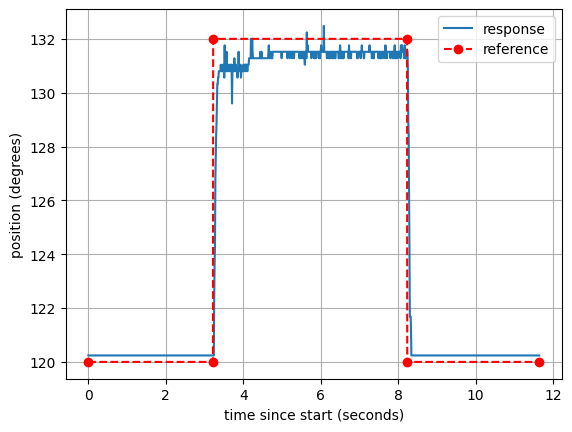

In [21]:
import matplotlib.pyplot as plt

df_response = df[df['command']==0]
plt.plot(df_response['time_since_start'], df_response['position_degree'], label='response')

df_ref = df[df['command']!=0]
duration = df_ref['command'].iloc[0]/1000

# Input the points (t, y)
inital_pos = 120
points = [(0, inital_pos), (df_ref.iloc[0]['time_since_start'], inital_pos), 
          (df_ref.iloc[0]['time_since_start']+duration, df_ref.iloc[0]['position_degree']),
          (df_ref.iloc[1]['time_since_start'], df_ref.iloc[0]['position_degree']),
          (df_ref.iloc[1]['time_since_start']+duration, df_ref.iloc[1]['position_degree']),
          (df_response.iloc[-1]['time_since_start'], df_ref.iloc[1]['position_degree'])
]        
# Extract x and y values from points
x_values = [point[0] for point in points]
y_values = [point[1] for point in points]
# Plot the points and connect them with straight lines
plt.plot(x_values, y_values, 'or--', label='reference')

plt.legend()
plt.xlabel('time since start (seconds)')
plt.ylabel('position (degrees)')
plt.grid(True)